In [1]:
import sys
sys.path.append('C:/Users/juans/OneDrive/Documentos/iaProyect/Cognitive')
print(sys.path)  # Esto mostrará todas las rutas en sys.path

from model.preprocessing.data_cleaning import DataCleaner
from model.utils.data_analysis import DataAnalyzer
from model.preprocessing.data_extraction import DataExtractor
from model.preprocessing.feature_extraction import FeatureSelector,FeatureVisualizer

data_extractor = DataExtractor()
data_analyzer = DataAnalyzer()


['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\python311.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv', '', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv\\Lib\\site-packages', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv\\Lib\\site-packages\\win32', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv\\Lib\\site-packages\\Pythonwin', 'C:/Users/juans/OneDrive/Documentos/iaProyect/Cognitive']


In [2]:
# Extraccion de base de datos

original_data = "/raw/DB sin RM (filtrado).csv" 
processed_data = "/DB sin RM (filtrado) - procesado.csv"

data_extractor.preprocess_csv(original_data, processed_data)
data = data_extractor.load_data("/processed", processed_data)

print(data_analyzer.describe_data(data=data))
#print features
data_extractor.save_array_to_txt(data.columns.values, "features.txt")

C:\Users/juans/OneDrive/Documentos/iaProyect/Cognitive\model\preprocessing\data_extraction.py:90: DtypeWarning: Columns (44,67) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path, encoding=encoding, delimiter=delimiter, header=0, quoting=csv.QUOTE_NONE, decimal=',')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2986 entries, 0 to 2985
Columns: 269 entries, Identificacin to limiter
dtypes: float64(12), int64(216), object(41)
memory usage: 6.1+ MB

Valores nulos por columna:
Identificacin                                 0
Lugar Nacimiento                              0
Municipio Atencin                             0
Edad                                          0
Gnero                                         0
Grupo Sanguneo                                0
Lateralidad                                   0
Autopercepcin Salud                           0
Estado Civil                                  0
Vive con pareja                               0
Nmero Hijos                                   0
Tipo Vivienda                                 0
Nmero Personas Viven Casa                     0
Vive solo                                     0
Estrato                                       0
Escolaridad                                   0
Ocupacin         

In [3]:

initial_features_descarted =["Identificacin","Grupo Sanguneo","Nmero Hijos","Tipo Vivienda","MHTA-1","MHTA-2","MHTA-3","Tiazida","Calcioantagonista","Betabloqueador","ARA-II","D-ASA","AH-K","B-ALFA",
 "B-ADRE","ASA","Antecedentes Sindrome Coronario","MSC-1","MSC-1.1","NITRATOS","CLOPIDO","Antecedentes Arritmias Cardiacas","MARR-1","MARR-2","ANTICOAG","AMIODARONA","DIGITAL","Antecedentes Dislipidemia",
 "Tipo dislipidemia","Tipo dislipidemia.1","B2","ANTILEUCO","COM. B","Antecedentes Cancer","Tipo cancer","Antecedentes Diabetes","i-DDP4","A-GLP1","Sulfonilureas","I-rpida","I-NPH","I-prolongada",
 "MPSI-1","MPSI-1.1","Nm cadas","Antecedentes Discapacidades","Antecedentes Otros","Otro M1","Otro M2","Otro M3","Otro M4","Otro M5","Otro M6","Otro M7","Cromo","Bisacodi","Metocarbam","Antigotosos",
 "Metotrexa","Leflunomida","Cloroqui-Hidr","Bifosfonatos","Simeticona","Antimuscarin","Ergotamina","Anticonv.","Levodopa","Vit y complementos","Acetam","IBP","Antiac.","Anti-H2","Tipo ciruga",
 "Sucralfato","Sulfazalacina","SulfaFer","Anti-H1","Esteroide O","Antecedentes Cirugias","Antecedentes Menarca","Antecedentes Menopausia","Tiempo menstruacin","Tiempo menopausia",
 "Antecedentes Embarazos","Antecedentes abortos","Antecedentes Partos","Antecedentes Cesareas","Antecedentes Hijos Vivos","Observacion Lawton","Observacion Minimental","Moca Recuerdo Intrusiones","Observacion Moca",
 "Observacion Cdr","Observacion Especialista","Total Moca","Total Minimental","limiter"]

initial_features_selected=["Lugar Nacimiento","Municipio Atencin","Edad","Gnero","Lateralidad","Autopercepcin Salud","Estado Civil","Vive con pareja","ADT",
 "Nmero Personas Viven Casa","Vive solo","Estrato","Escolaridad","Ocupacin","Salario","Antecedentes Alcohol","Antecedentes Tabaco","Antecedentes Sustancias Psicoactivas","Antecedentes Hta",
 "I-ECA","Tipo SC","STENT","Antecedentes Acv","Tipo ACV","M-DISL","ESTATINA","FIBRATOS","Antecedentes EPOC","MEPOC","ANTICOL","GLUC-I","TEOFI","OXIG","Antecedentes ERC","MERC-1","MERC-2","MERC-3",
 "CALCIO","A. FOLIC","Insulinoterapia","Tipo DM","MDM-1","MDM-2","Biguanida","Antecedentes Alteraciones Tiroideas", "Tipo Alt. Tiroidea", "Hipotiroidismo","MTIR","M. Tiroides","Antecedentes Problemas Auditivos",
 "Tipo problema auditivo", "Hipoacusia", "Antecedentes visuales", "Tipo problema visuales","Disminucin agudeza visual", "Antecedentes Demencias", "Antecedentes Convulsiones","Desc. Convulsiones",
 "Epilepsia", "Antecedentes Tec", "Tipo TEC","Antecedentes Enfermedades Psiquiatricas","Tipo enfermedad psiquitrica","Psiqu. Def","Insomnio","Sintomas psi","A. Valpro","CBZ","GABA",
 "iSRS","iSRS/N","AD-Atip","BZD","Antipsi-T","Antip-A","Antecedentes Caidas","AINES","Opiodes","Naturista","Antecedentes Familiar DC","Familiar con DC","Tipo DC AF","Antecedentes Familiares Otros",
 "Lawton Pre Salir Casa","Lawton Pre Caminar Habitacion","Lawton Pre Usar Telefono","Lawton Pre Ir Compras","Lawton Pre Tomar Medicamento","Lawton Pre Abrir Cerrar Ventanas","Lawton Pre Manejar Dinero",
 "Lawton Pre Encen Apag Radio Tv","Lawton Pre Manipular Interruptores","Lawton Pre Hacer Propia Comida","Lawton Pre Manipular Llaves","Lawton Pre Cortarse Uas","Lawton Pre Trabajo Liviano Casa",
 "Lawton Pre Trabajo Pesado Casa","Lawton Act Salir Casa","Lawton Act Caminar Habitacion","Lawton Act Usar Telefono","Lawton Act Ir Compras","Lawton Act Tomar Medicamento",
 "Lawton Act Abrir Cerrar Ventanas","Lawton Act Manejar Dinero","Lawton Act Encen Apag Radio Tv","Lawton Act Manipular Interruptores","Lawton Act Hacer Propia Comida","Lawton Act Manipular Llaves",
 "Lawton Act Cortarse Uas","Lawton Act Trabajo Liviano Casa","Lawton Act Trabajo Pesado Casa","Total Lawton Previo Sin Dificultad","Total Lawton Previo Con Dificultad","Total Lawton Previo Con Ayuda",
 "Total Lawton Previo No","Total Lawton Actual Sin Dificultad","Total Lawton Actual Con Dificultad","Total Lawton Actual Con Ayuda","Total Lawton Actual No","Diferencia Lawton","Minimental Ori Ao",
 "Minimental Ori Epoca","Minimental Ori Mes","Minimental Ori Dia","Minimental Ori Dia Semana","Minimental Ori Pais","Minimental Ori Departamento","Minimental Ori Ciudad","Minimental Ori Lugar",
 "Minimental Ori Piso","Minimental Reg Repeticion Palabras","Minimental Ate Calculo","Minimental Recobro","Minimental Len Identificacion Objetos","Minimental Len Repeticion Frase",
 "Minimental Len Comando","Minimental Len Lectura Frase","Minimental Len Escritura","Minimental Copiado Patron","Moca Vis Union Grafo","Moca Vis Copiar Cubo","Moca Vis Reloj Contorno",
 "Moca Vis Reloj Numeros","Moca Vis Reloj Agujas","Moca Identificacion Imagenes","Moca Memoria Intento 1","Moca Memoria Intento 2","Moca Ate Lista Numeros1","Moca Ate Lista Numeros2",
 "Moca Ate Serie Letras","Moca Ate Restas","Moca Len Repeticion Frases","Moca Len Fluidez","Moca Abstraccion","Moca Recuerdo Diferido","Moca Ori Dia Del Mes","Moca Ori Mes","Moca Ori Ao",
 "Moca Ori Dia De Semana","Moca Ori Lugar","Moca Ori Ciudad","Moca Menos 12 Anios Estudio","Total Gds","Cdr Memoria","Cdr Orientacion","Cdr Juicio","Cdr Vida Social","Cdr Hogar Y Aficiones",
 "Cdr Cuidado Personal","Total Cdr","Deterioro Cognitivo","Mdico Atencin"]

# Función para separar las características en diferentes DataFrames
selected_features = [f for f in  initial_features_selected if f in data.columns]
discarded_features = [f for f in initial_features_descarted if f in data.columns]

selected_df = data[selected_features]
discarded_df = data[discarded_features]

# Determinar las características que sobran
all_features = set(data.columns)
used_features = set(selected_features).union(discarded_features)
remaining_features = list(all_features - used_features)
remaining_df = data[remaining_features]

print("size of selected_df: ", selected_df.shape)
print("size of discarded_df: ", discarded_df.shape)
print("size of remaining_df: ", remaining_df.shape)


size of selected_df:  (2986, 172)
size of discarded_df:  (2986, 97)
size of remaining_df:  (2986, 0)


In [4]:
#Deterioro Cognitivo is y
X = selected_df.drop(columns=["Deterioro Cognitivo"])
y = selected_df["Deterioro Cognitivo"]
print("size of X: ", X.shape)
print("size of y: ", y.shape)

size of X:  (2986, 171)
size of y:  (2986,)


In [9]:


import pandas as pd
import numpy as np

# Instanciar y usar el preprocesador
preprocessor = DataCleaner(X, y)

preprocessor.encode_features(target_column='income', method='target')


# Limpieza de duplicados y datos nulos
#preprocessor.delete_null_data()
#preprocessor.delete_duplicate_rows()
#preprocessor.delete_Object_columns()

# Imputación de valores faltantes
#X_imputed = preprocessor.impute_missing_values()

# Estandarización
#preprocessor.standardize()

# normalización
#preprocessor.normalize_features()

#detectar y eliminar outliers
#preprocessor.delete_outliers().value_counts()

#balancear datos
#preprocessor.balance_data()

#generar columnas polinomiales
#xfold = preprocessor.generate_polynomial_columns()

#preprocessor.reduce_dimensionality(n_components=2,replace=True)







,Lugar Nacimiento,Municipio Atencin,Edad,Gnero,Lateralidad,Autopercepcin Salud,Estado Civil,Vive con pareja,ADT,Nmero Personas Viven Casa,...,Moca Menos 12 Anios Estudio,Total Gds,Cdr Memoria,Cdr Orientacion,Cdr Juicio,Cdr Vida Social,Cdr Hogar Y Aficiones,Cdr Cuidado Personal,Total Cdr,Mdico Atencin
0,0,1,63,0,1,1,1,1,0,3,...,1,1,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0
1,2,3,79,0,1,1,0,0,0,6,...,1,3,1.0,2.0,0.5,0.5,0.5,0.0,0.5,1
2,3,3,73,0,1,1,1,1,0,2,...,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,6,3,71,0,1,1,2,0,0,3,...,1,2,0.5,0.5,1.0,0.0,0.0,0.0,0.5,1
4,6,3,69,0,1,0,1,1,0,4,...,1,2,0.0,0.5,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,0,0,67,0,1,3,4,0,0,4,...,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2982,0,7,76,0,1,1,4,0,0,4,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2983,0,10,66,0,1,1,1,1,0,4,...,1,3,0.5,0.5,0.5,0.5,0.5,0.0,0.5,1
2984,0,11,75,0,1,1,1,1,0,2,...,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2986 entries, 0 to 2985
Columns: 172 entries, Lugar Nacimiento to Deterioro Cognitivo
dtypes: float64(23), int64(149)
memory usage: 3.9 MB

Valores nulos por columna:
Lugar Nacimiento                            0
Municipio Atencin                           0
Edad                                        0
Gnero                                       0
Lateralidad                                 0
Autopercepcin Salud                         0
Estado Civil                                0
Vive con pareja                             0
ADT                                         0
Nmero Personas Viven Casa                   0
Vive solo                                   0
Estrato                                     0
Escolaridad                                 0
Ocupacin                                    0
Salario                                     0
Antecedentes Alcohol                        0
Antecedentes Tabaco                         0
A

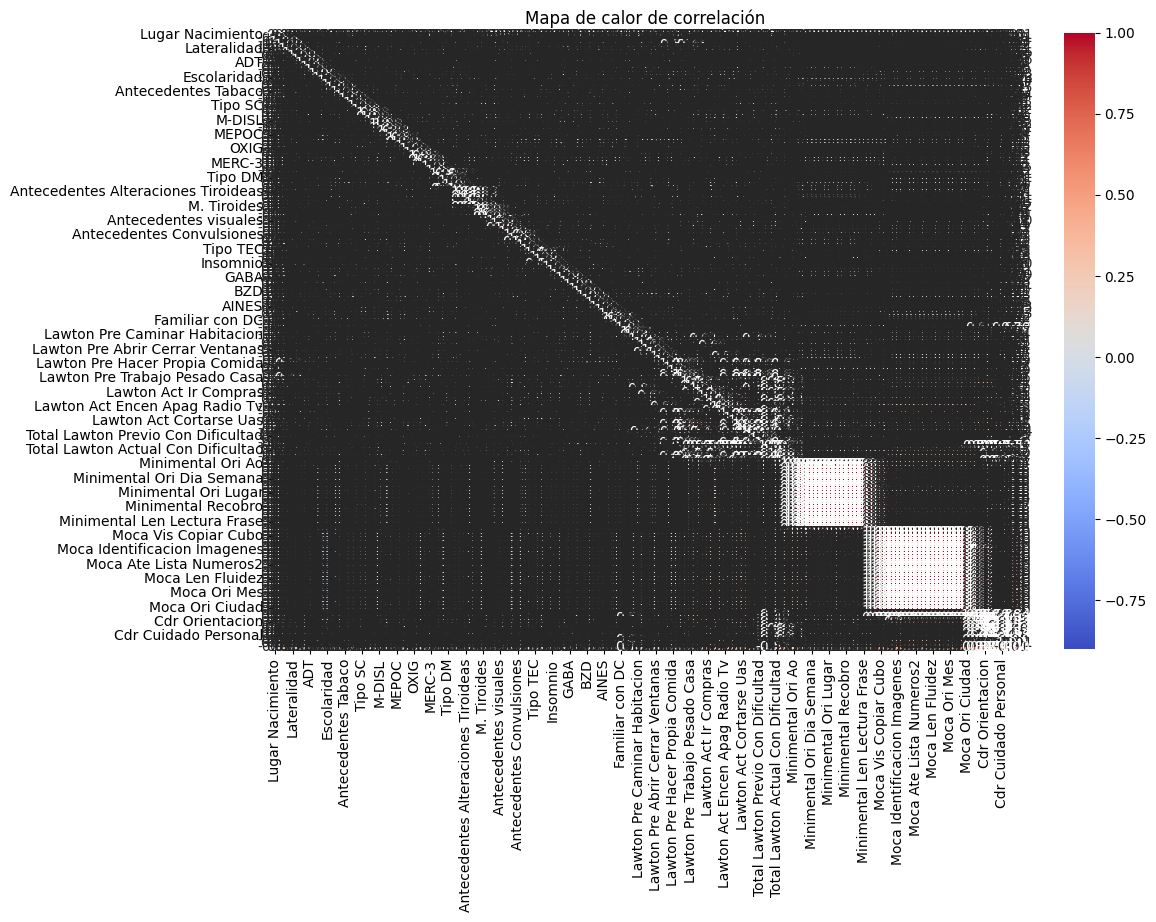

In [11]:

data = pd.concat([preprocessor.X, preprocessor.y], axis=1)
print(data_analyzer.describe_data(data=data))
data_analyzer.visualize_correlation(data=data)
#data_analyzer.visualize_data(data, kind='boxplot')

In [ ]:
X = preprocessor.X
y = preprocessor.y


# Inicializar el selector de características
selector = FeatureSelector(X, y)

# 1. Selección de características con Chi-squared
chi2_result = selector.select_features_chi2(k=14)
FeatureVisualizer.plot_scores(chi2_result['features'], chi2_result['scores'], title='Chi-squared Scores')

# 2. Selección de características con Spearman
spearman_result = selector.select_features_spearman(threshold=0.01)
FeatureVisualizer.plot_correlations(spearman_result['selected_features'], spearman_result['correlations'], title='Spearman Correlation Coefficients')

# 3. Selección de características con Lasso
lasso_result = selector.lasso_feature_selection(alpha=0.01)
FeatureVisualizer.plot_coefficients(lasso_result['selected_features'], lasso_result['coefficients'], title='Lasso Coefficients')

# 4. Selección de características con Sequential Feature Selector
sfs_result = selector.sequential_feature_selection(n_features_to_select=13, direction='forward')
print("Sequential Feature Selection Selected Features:", sfs_result['selected_features'])

# 5. Importancia de características con Random Forest
rf_result = selector.random_forest_feature_importance(n_features=14)
FeatureVisualizer.plot_importances(rf_result['selected_features'], rf_result['importances'], title='Random Forest Feature Importances')